In [72]:
import pandas as pd 
import prince
import matplotlib
import matplotlib.pyplot as plt

In [59]:
# X = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/adult+stretch.data')
# X.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']

df = pd.read_csv('Perfil_Investidor x Aplicação_mca.csv', sep=';')
df1 = df.drop(['Estudante'], axis=1)

print(df1.head())

  Perfil de Investidor Tipo de Aplicação Financeira Estado Civil
0          Conservador                     Poupança       Casado
1          Conservador                     Poupança       Casado
2          Conservador                     Poupança       Casado
3          Conservador                     Poupança     Solteiro
4          Conservador                     Poupança       Casado


In [43]:
df1

,Perfil de Investidor,Tipo de Aplicação Financeira,Estado Civil
0,Conservador,Poupança,Casado
1,Conservador,Poupança,Casado
2,Conservador,Poupança,Casado
3,Conservador,Poupança,Solteiro
4,Conservador,Poupança,Casado
...,...,...,...
95,Agressivo,Ações,Solteiro
96,Agressivo,Ações,Solteiro
97,Agressivo,Ações,Solteiro
98,Agressivo,Ações,Solteiro


In [33]:
df1[['Origem', 'Modal', 'Segmento']].describe()

KeyError: "None of [Index(['Origem', 'Modal', 'Segmento'], dtype='object')] are in the [columns]"

In [10]:
df1['Origem'].value_counts()


AutoCadastro       587
EmpresaParceira    413
Name: Origem, dtype: int64

In [20]:
df1.groupby("Origem").size().reset_index(name="count")

,Origem,count
0,AutoCadastro,587
1,EmpresaParceira,413


In [11]:
df1['Modal'].value_counts()

MOTORCYCLE    618
BIKE          284
CAR            98
Name: Modal, dtype: int64

In [12]:
df1['Segmento'].value_counts()


Fiel        513
Novo        278
Desistiu    209
Name: Segmento, dtype: int64

In [21]:
df1.groupby(['Origem', 'Modal', 'Segmento']).size().reset_index(name="count")

,Origem,Modal,Segmento,count
0,AutoCadastro,BIKE,Desistiu,30
1,AutoCadastro,BIKE,Fiel,48
2,AutoCadastro,BIKE,Novo,55
3,AutoCadastro,CAR,Desistiu,11
4,AutoCadastro,CAR,Fiel,2
5,AutoCadastro,CAR,Novo,6
6,AutoCadastro,MOTORCYCLE,Desistiu,95
7,AutoCadastro,MOTORCYCLE,Fiel,279
8,AutoCadastro,MOTORCYCLE,Novo,61
9,EmpresaParceira,BIKE,Desistiu,13


AttributeError: 'MCA' object has no attribute 'partial_row_coordinates'

In [191]:
mca = prince.MCA(n_components=3,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(df1)

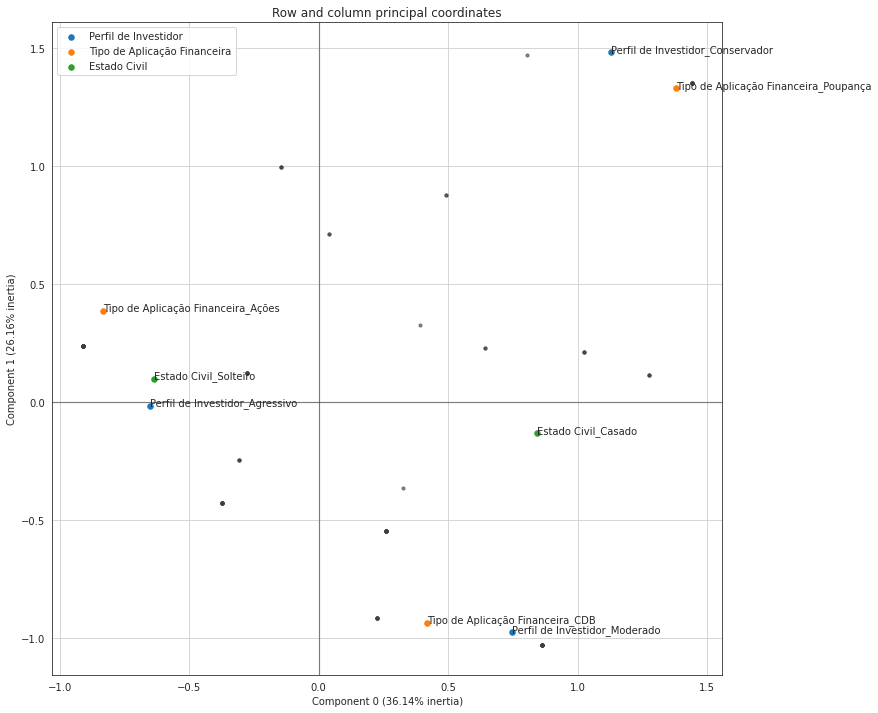

In [192]:
ax = mca.plot_coordinates(X=df1, figsize=(12, 12), x_component=0, y_component=1,
                         show_row_points=True, row_points_size=10,
                         row_points_alpha=0.6, show_row_labels=False,
                         show_column_points=True, column_points_size=30, show_column_labels=True,
                         legend_n_cols=1)

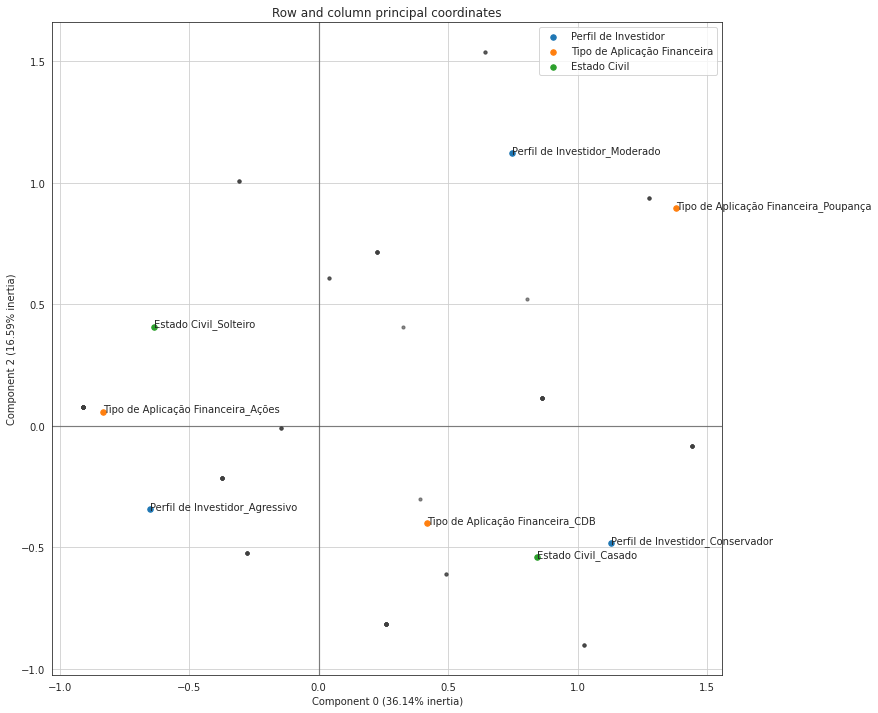

In [193]:
ay = mca.plot_coordinates(X=df1, figsize=(12, 12), x_component=0, y_component=2,
                         show_row_points=True, row_points_size=10,
                         row_points_alpha=0.6, show_row_labels=False,
                         show_column_points=True, column_points_size=30, show_column_labels=True,
                         legend_n_cols=1)

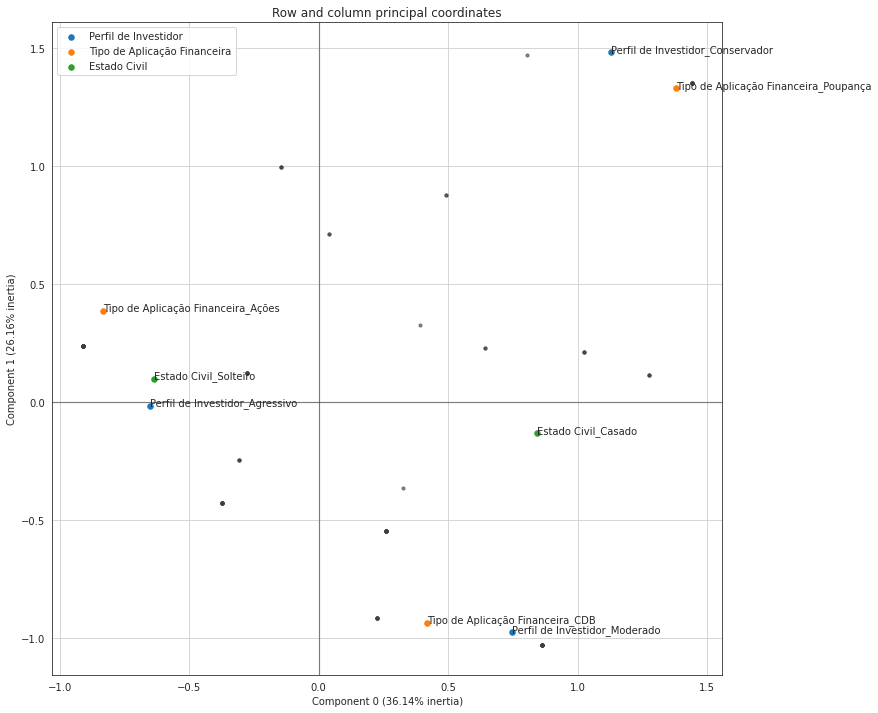

In [194]:
ax = mca.plot_coordinates(
    X=df1,
    figsize=(12, 12),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1
)


In [195]:
ax

<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (36.14% inertia)', ylabel='Component 1 (26.16% inertia)'>

In [196]:
mca.eigenvalues_

[0.602304511262007, 0.4359878227115965, 0.2764727580687406]

In [197]:
mca.total_inertia_

1.6666666666666667

In [198]:
mca.explained_inertia_

[0.3613827067572042, 0.26159269362695786, 0.16588365484124437]

<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (36.14% inertia)', ylabel='Component 1 (26.16% inertia)'>

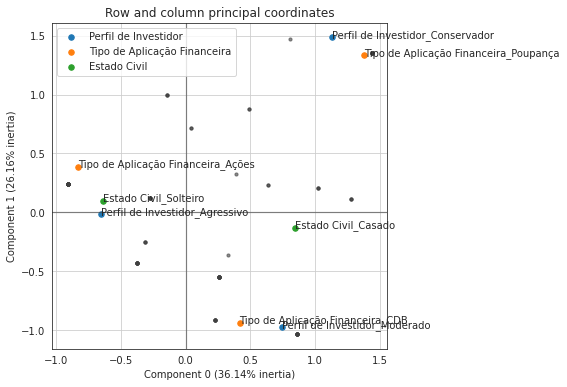

In [203]:
mca.plot_coordinates(df1, show_column_labels=True) # same as calling ca.fs_r_sup(df_new) for *another* test set.


In [207]:
mca.value()

AttributeError: 'MCA' object has no attribute 'value'

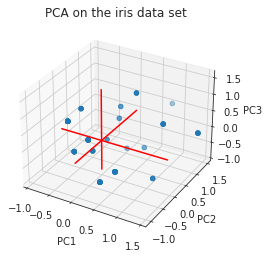

In [150]:
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mca[0], mca[1], mca[2])
 
# make simple, bare axis lines through space:
xAxisLine = ((min(mca[0]), max(mca[0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(mca[1]), max(mca[1])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(mca[2]), max(mca[2])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show()

In [47]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling



In [48]:
foods_binary = np.random.randint(2, size=(100, 10)) #initial dataset
print(foods_binary.shape)

(100, 10)


In [49]:
dis_matrix = pairwise_distances(foods_binary, metric = 'jaccard')
print(dis_matrix.shape)

(100, 100)
/home/adachi/development/cafe_com_analytics/stock_market_index_daily_direction/.venv/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


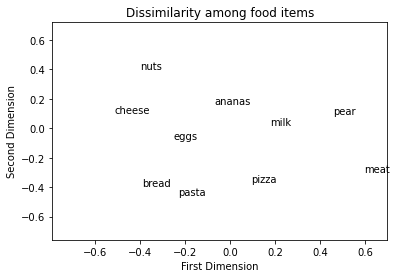

In [50]:
mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(dis_matrix)  
mds_coords = mds_model.fit_transform(dis_matrix) 
                                                                                                                                  
food_names = ['pasta', 'pizza', 'meat', 'eggs', 'cheese', 'ananas', 'pear', 'bread', 'nuts', 'milk']
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = food_names
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among food items')    
plt.show()

Automatically created module for IPython interactive environment


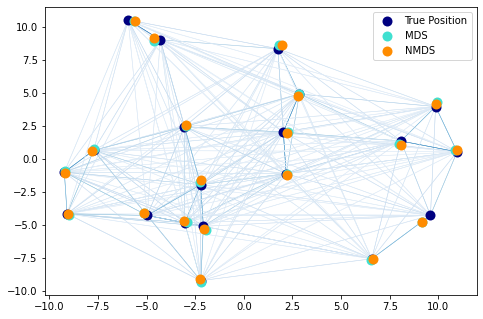

In [51]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
# License: BSD

print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

EPSILON = np.finfo(np.float32).eps
n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / (similarities + EPSILON) * 100
np.fill_diagonal(similarities, 0)
# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(np.full(len(segments), 0.5))
ax.add_collection(lc)

plt.show()

<Figure size 480x480 with 0 Axes>

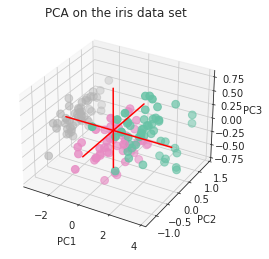

In [87]:
# libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
 
# Get the iris dataset
sns.set_style("white")
df = sns.load_dataset('iris')

# create figure
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# Keep the 'species' column appart + make it numeric for coloring
df['species']=pd.Categorical(df['species'])
my_color=df['species'].cat.codes
df = df.drop('species', 1)
 
# Run The PCA
pca = PCA(n_components=3)
pca.fit(df)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show()

In [91]:
df = pd.read_csv('Perfil_Investidor x Aplicação_mca.csv', sep=';')
df = df.drop(['Estudante'], axis=1)

In [92]:
df

,Perfil de Investidor,Tipo de Aplicação Financeira,Estado Civil
0,Conservador,Poupança,Casado
1,Conservador,Poupança,Casado
2,Conservador,Poupança,Casado
3,Conservador,Poupança,Solteiro
4,Conservador,Poupança,Casado
...,...,...,...
95,Agressivo,Ações,Solteiro
96,Agressivo,Ações,Solteiro
97,Agressivo,Ações,Solteiro
98,Agressivo,Ações,Solteiro


In [93]:
# Keep the 'species' column appart + make it numeric for coloring
df['Perfil de Investidor']=pd.Categorical(df['Perfil de Investidor'])
my_color=df['Perfil de Investidor'].cat.codes
df = df.drop('Perfil de Investidor', 1)
df['Tipo de Aplicação Financeira']=pd.Categorical(df['Tipo de Aplicação Financeira'])
my_color=df['Tipo de Aplicação Financeira'].cat.codes
df = df.drop('Tipo de Aplicação Financeira', 1)
df['Estado Civil']=pd.Categorical(df['Estado Civil'])
my_color=df['Estado Civil'].cat.codes
df = df.drop('Estado Civil', 1)

In [94]:
df

""
0
1
2
3
4
...
95
96
97
98


In [ ]:
# libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
 
# Get the iris dataset
sns.set_style("white")
df = sns.load_dataset('iris')

# create figure
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 

 
# Run The PCA
pca = PCA(n_components=3)
pca.fit(df)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show()

In [101]:
df = sns.load_dataset('iris')

In [102]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [105]:
df['species']=pd.Categorical(df['species'])


In [106]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [171]:
import unittest

import matplotlib as mpl
import pandas as pd

import prince


class TestMCA(unittest.TestCase):

    def setUp(self):
        self.X = pd.DataFrame(
            data=[
                [0, 'C', 1, 0, 1, 'C', 1, 1, 1, 1],
                [1, 'B', 0, 1, 0, 'B', 0, 1, 0, 0],
                [1, 'A', 0, 1, 0, 'A', 0, 1, 0, 0],
                [1, 'A', 0, 1, 0, 'A', 0, 0, 0, 0],
                [0, 'C', 1, 0, 1, 'C', 1, 0, 1, 1],
                [0, 'B', 1, 0, 1, 'B', 1, 0, 1, 1]
            ],
            columns=['E1 fruity', 'E1 woody', 'E1 coffee',
                     'E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody',
                     'E3 fruity', 'E3 butter', 'E3 woody'],
            index=[1, 2, 3, 4, 5, 6]
        )

    def test_pandas_dataframe(self):
        mca = prince.MCA(n_components=2)
        self.assertTrue(isinstance(mca.fit(self.X), prince.MCA))
        self.assertTrue(isinstance(mca.transform(self.X), pd.DataFrame))

    def test_numpy_array(self):
        mca = prince.MCA(n_components=2)
        self.assertTrue(isinstance(mca.fit(self.X.to_numpy()), prince.MCA))
        self.assertTrue(isinstance(mca.transform(self.X.to_numpy()), pd.DataFrame))

    def test_plot_show_row_labels(self):
        mca = prince.MCA(n_components=2)
        mca.fit(self.X)
        ax = mca.plot_coordinates(self.X, show_row_labels=True)
        self.assertTrue(isinstance(ax, mpl.axes.Axes))

    def test_plot_show_column_labels(self):
        mca = prince.MCA(n_components=2)
        mca.fit(self.X)
        ax = mca.plot_coordinates(self.X, show_column_labels=True)
        self.assertTrue(isinstance(ax, mpl.axes.Axes))

In [172]:
test_plot_show_row_labels

NameError: name 'test_plot_show_row_labels' is not defined

In [173]:
test_plot_show_row_labels()

NameError: name 'test_plot_show_row_labels' is not defined

In [175]:
test_plot_show_row_labels(self)

NameError: name 'test_plot_show_row_labels' is not defined

In [177]:
X = pd.DataFrame(
            data=[
                [0, 'C', 1, 0, 1, 'C', 1, 1, 1, 1],
                [1, 'B', 0, 1, 0, 'B', 0, 1, 0, 0],
                [1, 'A', 0, 1, 0, 'A', 0, 1, 0, 0],
                [1, 'A', 0, 1, 0, 'A', 0, 0, 0, 0],
                [0, 'C', 1, 0, 1, 'C', 1, 0, 1, 1],
                [0, 'B', 1, 0, 1, 'B', 1, 0, 1, 1]
            ],
            columns=['E1 fruity', 'E1 woody', 'E1 coffee',
                     'E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody',
                     'E3 fruity', 'E3 butter', 'E3 woody'],
            index=[1, 2, 3, 4, 5, 6]
        )

In [185]:
X

,E1 fruity,E1 woody,E1 coffee,E2 red fruit,E2 roasted,E2 vanillin,E2 woody,E3 fruity,E3 butter,E3 woody
1,0,C,1,0,1,C,1,1,1,1
2,1,B,0,1,0,B,0,1,0,0
3,1,A,0,1,0,A,0,1,0,0
4,1,A,0,1,0,A,0,0,0,0
5,0,C,1,0,1,C,1,0,1,1
6,0,B,1,0,1,B,1,0,1,1


In [187]:
mca = prince.MCA(n_components=2)
mca.fit(X)

MCA()

<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (212.55% inertia)', ylabel='Component 1 (87.77% inertia)'>

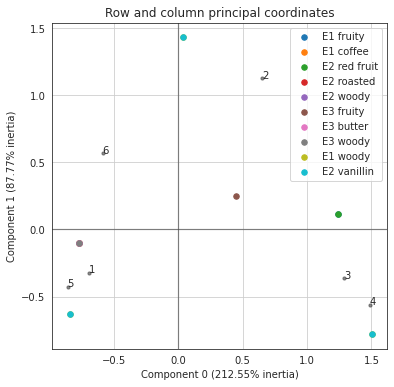

In [188]:
mca.plot_coordinates(X, show_row_labels=True)